# Importing the Dependencies

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout


# Data Collecetion and Analysis

In [85]:
#Loading the data from CSV file to pandas dataframe
df = pd.read_csv(r"E:\TEJU\Dataset\diabetes.csv")

In [88]:
# Checking the Columns
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<AxesSubplot:>

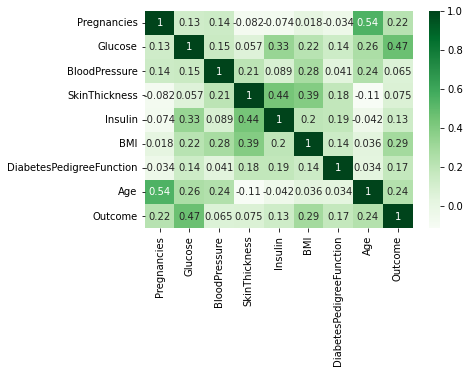

In [89]:
#  Checking the corelation between Columns
sns.heatmap(df.corr(),annot=True,cmap='Greens')

In [90]:
# Dropping the Columns which have low corelation
data = df.drop(columns=['Age','SkinThickness','BloodPressure','BMI'],axis=1)

In [91]:
# printing the first 5 rows of the dataframe
data.head()

,Pregnancies,Glucose,Insulin,DiabetesPedigreeFunction,Outcome
0,6,148,0,0.627,1
1,1,85,0,0.351,0
2,8,183,0,0.672,1
3,1,89,94,0.167,0
4,0,137,168,2.288,1


In [93]:
# Checking the no. of rows and columns in the dataframe
data.shape

(768, 5)

In [94]:
# Getting more information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   Insulin                   768 non-null    int64  
 3   DiabetesPedigreeFunction  768 non-null    float64
 4   Outcome                   768 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 30.1 KB


In [95]:
# Getting some stasticial measures about the data
data.describe()

,Pregnancies,Glucose,Insulin,DiabetesPedigreeFunction,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,79.799479,0.471876,0.348958
std,3.369578,31.972618,115.244002,0.331329,0.476951
min,0.000000,0.000000,0.000000,0.078000,0.000000
25%,1.000000,99.000000,0.000000,0.243750,0.000000
50%,3.000000,117.000000,30.500000,0.372500,0.000000
75%,6.000000,140.250000,127.250000,0.626250,1.000000
max,17.000000,199.000000,846.000000,2.420000,1.000000


In [96]:
# Checking for missing values in each columns
data.isnull().sum()

Pregnancies                 0
Glucose                     0
Insulin                     0
DiabetesPedigreeFunction    0
Outcome                     0
dtype: int64

In [97]:
# Checking the distribution of target variable 'Outcome'
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

1 --> Positive
0 --> Healthy

# Data Preprocessing 

In [98]:
# Checking the duplicate values
data.duplicated().sum()

0

In [99]:
# Droping the duplicate values if any 
data.drop_duplicates()

,Pregnancies,Glucose,Insulin,DiabetesPedigreeFunction,Outcome
0,6,148,0,0.627,1
1,1,85,0,0.351,0
2,8,183,0,0.672,1
3,1,89,94,0.167,0
4,0,137,168,2.288,1
...,...,...,...,...,...
763,10,101,180,0.171,0
764,2,122,0,0.340,0
765,5,121,112,0.245,0
766,1,126,0,0.349,1


Separating the features & Target

In [100]:
x = data.drop(columns=['Outcome'],axis=1)
y = data['Outcome']

In [101]:
x

,Pregnancies,Glucose,Insulin,DiabetesPedigreeFunction
0,6,148,0,0.627
1,1,85,0,0.351
2,8,183,0,0.672
3,1,89,94,0.167
4,0,137,168,2.288
...,...,...,...,...
763,10,101,180,0.171
764,2,122,0,0.340
765,5,121,112,0.245
766,1,126,0,0.349


In [102]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

# Spliting the data into Training & Testing Data

In [104]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [105]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [106]:
x.shape,x_train.shape,x_test.shape

((768, 4), (614, 4), (154, 4))

In [107]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [108]:
x_train

array([[ 0.90832902,  0.91569367,  0.3736349 ,  0.67740401],
       [ 0.03644676, -0.75182191, -0.69965674, -0.07049698],
       [-1.12606292,  1.38763205,  5.09271083, -0.11855487],
       ...,
       [ 0.03644676, -0.84620959, -0.69965674, -0.95656442],
       [ 2.0708387 , -1.12937261, -0.69965674, -0.50001442],
       [ 0.32707418,  0.47521786, -0.69965674,  0.52121586]])

In [109]:
x_test

array([[-8.35435497e-01,  2.45735903e+00, -6.99656737e-01,
         2.78594417e+00],
       [-5.44808078e-01, -4.37196330e-01,  1.52162022e-01,
        -1.87638099e-01],
       [ 3.64467611e-02, -1.41253563e+00, -6.99656737e-01,
        -2.26685139e-01],
       [ 3.27074180e-01,  1.41909460e+00,  7.91026091e-01,
         3.62024077e-01],
       [-1.12606292e+00, -3.11346097e-01, -6.99656737e-01,
         5.81288224e-01],
       [-8.35435497e-01, -1.25522284e+00, -3.58929234e-01,
        -5.51075932e-01],
       [ 1.48958386e+00,  9.78618790e-01,  7.56953341e-01,
         1.28113132e+00],
       [-2.54180658e-01,  1.73372019e+00,  6.29180527e-01,
         2.06507574e+00],
       [-5.44808078e-01,  1.92054834e-01,  1.64284485e+00,
         3.40468957e+00],
       [ 6.17701600e-01, -5.63046563e-01,  9.18798905e-01,
        -4.27927575e-01],
       [-2.54180658e-01,  1.16739414e+00,  1.38729922e+00,
         1.15497935e+00],
       [ 3.27074180e-01,  2.07980833e+00,  1.06360809e+00,
      

In [110]:
model = Sequential()
model.add(Dense(128, input_dim=x_train.shape[1],activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [111]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [112]:
history = model.fit(x_train, y_train,epochs=50,batch_size=16,validation_data=(x_test, y_test))


Epoch 1/50
39/39 [==============================] - 1s 7ms/step - loss: 0.6994 - accuracy: 0.6107 - val_loss: 0.6032 - val_accuracy: 0.7208
Epoch 2/50
39/39 [==============================] - 0s 5ms/step - loss: 0.6197 - accuracy: 0.6824 - val_loss: 0.5224 - val_accuracy: 0.7792
Epoch 3/50
39/39 [==============================] - 0s 3ms/step - loss: 0.5897 - accuracy: 0.6873 - val_loss: 0.4810 - val_accuracy: 0.7922
Epoch 4/50
39/39 [==============================] - 0s 3ms/step - loss: 0.5803 - accuracy: 0.6938 - val_loss: 0.4623 - val_accuracy: 0.7792
Epoch 5/50
39/39 [==============================] - 0s 6ms/step - loss: 0.5790 - accuracy: 0.7199 - val_loss: 0.4563 - val_accuracy: 0.7792
Epoch 6/50
39/39 [==============================] - 0s 3ms/step - loss: 0.5525 - accuracy: 0.7329 - val_loss: 0.4430 - val_accuracy: 0.7727
Epoch 7/50
39/39 [==============================] - 0s 3ms/step - loss: 0.5490 - accuracy: 0.7264 - val_loss: 0.4503 - val_accuracy: 0.7727
Epoch 8/50
39/39 [==

In [113]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               640       
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                

In [114]:
y_pred = (model.predict(x_test)>0.5).astype("int64")
accuracy = accuracy_score(y_test,y_pred)

In [115]:
print(f"Model Accuracy is :{accuracy*100:.2f}%")

Model Accuracy is :81.17%
